In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
img = cv2.imread("C:/Users/krish/OneDrive/Desktop/MACHINE LEARNING/Image Classification/model/Pictures/Maria Sharapova/20623-maria-sharapova-1920x1200-sport-wallpaper.jpg")
img.shape

(1200, 1920, 3)

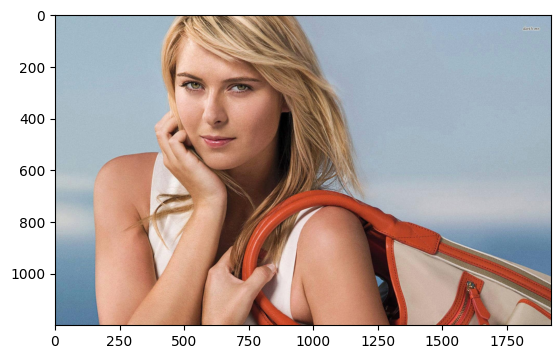

In [51]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1920)

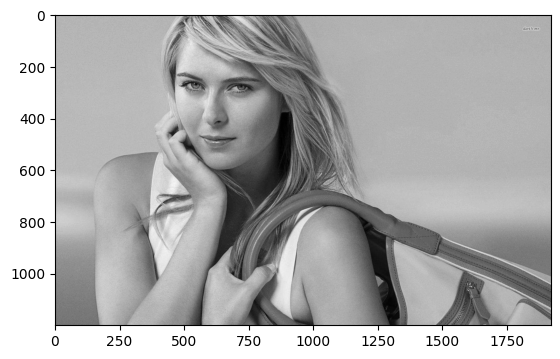

In [53]:

plt.imshow(gray,cmap='gray')

In [47]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +  'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)

faces

array([[377, 101, 473, 473]], dtype=int32)

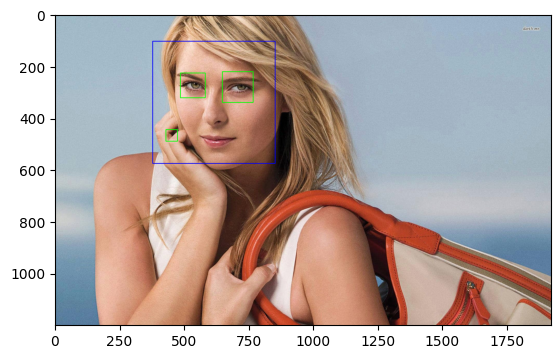

In [48]:
cv2.destroyAllWindows()

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.1,minNeighbors=10,minSize=(30,30))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()        
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


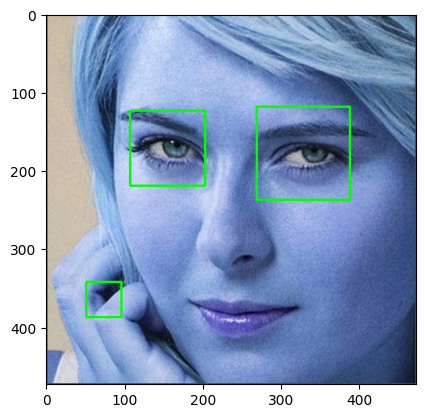

In [49]:
plt.imshow(roi_color,cmap='gray')

In [75]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            return roi_color
    return None
        

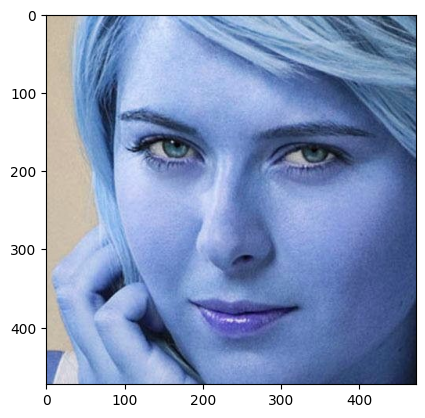

In [56]:
cropped_img = get_cropped_image_if_2_eyes("C:/Users/krish/OneDrive/Desktop/MACHINE LEARNING/Image Classification/model/Pictures/Maria Sharapova/20623-maria-sharapova-1920x1200-sport-wallpaper.jpg")
plt.imshow(cropped_img)

In [80]:
path_to_data = "C:/Users/krish/OneDrive/Desktop/MACHINE LEARNING/Image Classification/model/Pictures/"
path_to_cr_data = "C:/Users/krish/OneDrive/Desktop/MACHINE LEARNING/Image Classification/model/Pictures/cropped"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if(entry.is_dir()):
        img_dirs.append(entry.path)

In [81]:
img_dirs

['./Pictures/Cristiano_Ronaldo',
 './Pictures/Lionel_Messi',
 './Pictures/Maria_Sharapova',
 './Pictures/Serena_Williams',
 './Pictures/Virat_Kohli']

In [82]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [83]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count=1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_img_dirs.append(cropped_folder)
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_file_name = celebrity_name +  str(count) + ".png"
            cropped_file_path = cropped_folder + "/" +  cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
        
    

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
